In [22]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings(action='ignore')

In [23]:
df = pd.read_csv("housing_price_dataset.csv")
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [24]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


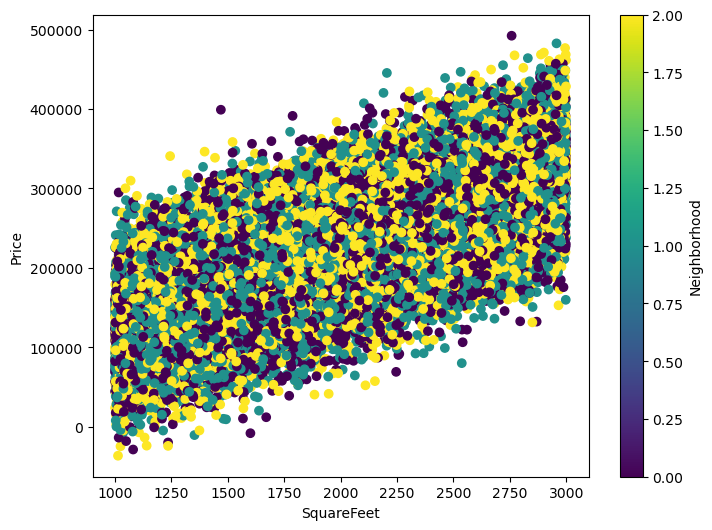

In [25]:
plt.figure(figsize=(8, 6))
df["Neighborhood"] = df["Neighborhood"].astype("category")
plt.scatter(x=df["SquareFeet"], y=df["Price"], c=df["Neighborhood"].cat.codes, cmap='viridis')
plt.xlabel("SquareFeet")
plt.ylabel("Price")
plt.colorbar(label="Neighborhood")
plt.show()

In [26]:
encoder = LabelEncoder()
df["Neighborhood"] = encoder.fit_transform(df["Neighborhood"])
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355.283618
1,2459,3,2,0,1980,195014.221626
2,1860,2,1,1,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,1,2001,272436.239065


In [27]:
df_without_null = df.drop(df[df.Price <= 0].index, axis = 0, inplace = True)

<Axes: >

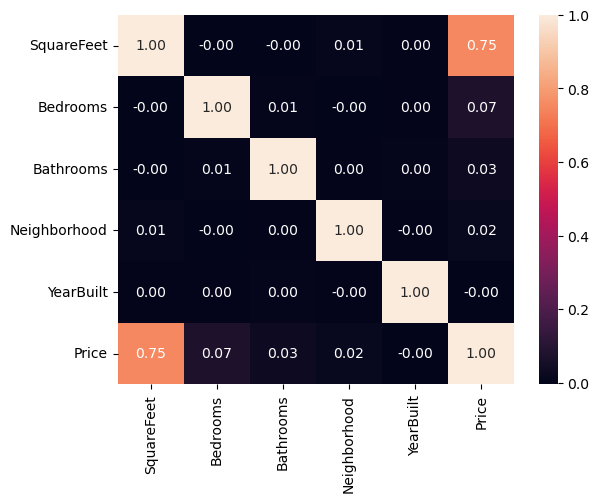

In [28]:
sns.heatmap(df.corr(method='pearson'), annot=True, fmt=".2f")

In [29]:
X = df.drop(columns = ["Price", "Neighborhood", "YearBuilt"], axis = 1)
y = df["Price"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [30]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

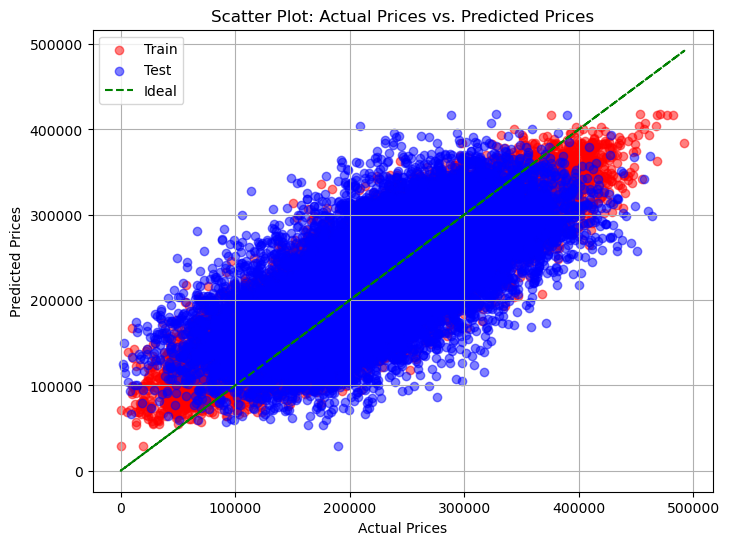

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='red', label='Train', alpha=0.5)
plt.scatter(y_test, y_test_pred, color='blue', label='Test', alpha=0.5)
plt.plot(y_train, y_train, color='green', linestyle='--', label='Ideal')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Scatter Plot: Actual Prices vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()